# Step 1: Introduction and Project Overview

## Project Title:
**Customer Churn Prediction Using Python**

### Objective:
To analyze customer data, derive insights, and build a machine learning model to predict customer churn (i.e., whether a customer will leave or stay).

### Key Steps:
1. **Load and explore the dataset.**  
2. **Clean and preprocess the data.**  
3. **Perform exploratory data analysis (EDA).**  
4. **Build a predictive machine learning model.**  
5. **Evaluate the model.**  
6. **Save the model and export results.**  
7. **Upload the project to GitHub for portfolio use.**

# Step 2: Setup and Library Imports

In [1]:
# Step 2: Import Libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestClassifier  # Machine Learning model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluation
import joblib  # To save the model

# Display settings for better outputs
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")

Libraries imported successfully!


# Step 3: Load the Dataset

In [2]:
# Step 3: Load Dataset
# Define the file path
file_path = r'C:\Users\Asus\Music\Customer Churn Prediction Using Python Project\Telco_customer_churn.xlsx'

# Load dataset
data = pd.read_excel(file_path)

# Display the first few rows
print("Dataset loaded successfully!")
data.head()

Dataset loaded successfully!


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.96,-118.27,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.06,-118.31,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.05,-118.29,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.06,-118.32,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.04,-118.27,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


# Step 4: Explore the Dataset

In [3]:
# Step 4: Explore Dataset
print("Shape of the dataset:", data.shape)  # Rows and columns
print("\nDataset information:")
data.info()  # Data types and non-null counts

print("\nSummary statistics of numerical columns:")
data.describe()  # Summary stats for numerical features

print("\nChecking for missing values:")
print(data.isnull().sum())  # Count missing values per column

Shape of the dataset: (7043, 33)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines   

# Step 5: Data Cleaning

In [4]:
# Step 5: Data Cleaning
# Drop the 'CustomerID' column as it doesn't contribute to churn prediction
if 'CustomerID' in data.columns:
    data = data.drop(['CustomerID'], axis=1)  # Removing 'CustomerID'
else:
    print("Column 'CustomerID' not found in the dataset.")

# Handle missing values
data = data.dropna()  # Dropping rows with missing values

print("After cleaning, the shape of the dataset is:", data.shape)

After cleaning, the shape of the dataset is: (1869, 32)


# Step 6: Encode Categorical Data

In [5]:
# Step 6: Encode Categorical Variables
data_encoded = pd.get_dummies(data, drop_first=True)  # One-hot encoding
print("Dataset after encoding:")
data_encoded.head()

Dataset after encoding:


Count  Zip Code  Latitude  Longitude  Tenure Months  Monthly Charges  \
0      1     90003     33.96    -118.27              2            53.85   
1      1     90005     34.06    -118.31              2            70.70   
2      1     90006     34.05    -118.29              8            99.65   
3      1     90010     34.06    -118.32             28           104.80   
4      1     90015     34.04    -118.27             49           103.70   

   Churn Value  Churn Score  CLTV  City_Adelanto  City_Adin  \
0            1           86  3239          False      False   
1            1           67  2701          False      False   
2            1           86  5372          False      False   
3            1           84  5003          False      False   
4            1           89  5340          False      False   

   City_Agoura Hills  City_Aguanga  City_Ahwahnee  City_Albany  \
0              False         False          False        False   
1              False         False          False        False   
2              False         False          False        False   
3              False         False          False        False   
4              False         False          False        False   

   City_Alderpoint  City_Alhambra  City_Alpaugh  City_Alpine  City_Altadena  \
0            False          False         False        False          False   
1            False          False         False        False          False   
2            False          False         False        False          False   
3            False          False         False        False          False   
4            False          False         False        False          False   

   City_Alturas  City_Alviso  City_Amador City  City_Amboy  City_Anaheim  \
0         False        False             False       False         False   
1         False        False             False       False         False   
2         False        False             False       False         False   
3         False        False             False       False         False   
4         False        False             False       False         False   

   City_Anderson  City_Angels Camp  City_Angelus Oaks  City_Angwin  \
0          False             False              False        False   
1          False             False              False        False   
2          False             False              False        False   
3          False             False              False        False   
4          False             False              False        False   

   City_Annapolis  City_Antelope  City_Antioch  City_Anza  City_Apple Valley  \
0           False          False         False      False              False   
1           False          False         False      False              False   
2           False          False         False      False              False   
3           False          False         False      False              False   
4           False          False         False      False              False   

   City_Applegate  City_Aptos  City_Arbuckle  City_Arcadia  City_Armona  \
0           False       False          False         False        False   
1           False       False          False         False        False   
2           False       False          False         False        False   
3           False       False          False         False        False   
4           False       False          False         False        False   

   City_Arnold  City_Aromas  City_Atherton  City_Atwater  City_Auburn  \
0        False        False          False         False        False   
1        False        False          False         False        False   
2        False        False          False         False        False   
3        False        False          False         False        False   
4        False        False          False         False        False   

   City_Avalon  City_Avenal  City_Avery  City_Azusa 

# Step 7: Exploratory Data Analysis (EDA)

# 1. Churn Distribution Plot

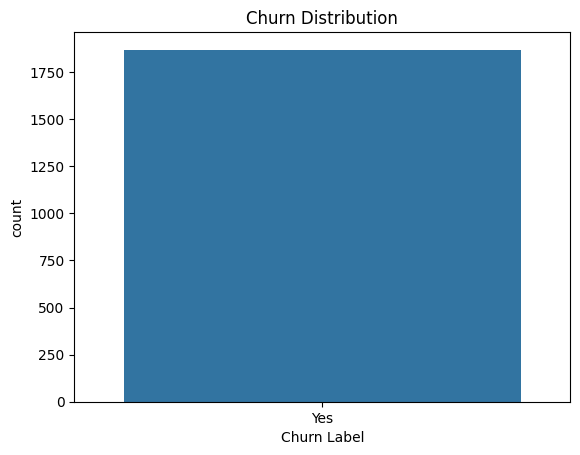

In [6]:
# Churn distribution plot
sns.countplot(data=data, x='Churn Label')  # Assuming 'Churn Label' is the correct column for churn status
plt.title("Churn Distribution")
plt.show()

# 2. Correlation Heatmap

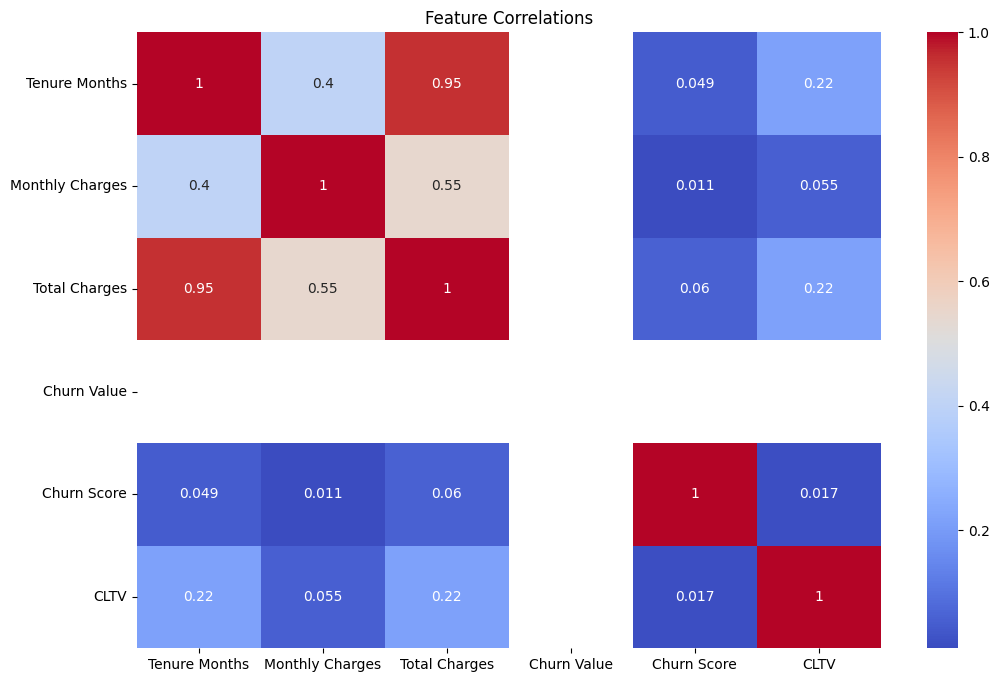

In [7]:
# Selecting numerical columns for correlation
numerical_cols = [
    'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV'
]

# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")  # Use the appropriate DataFrame
plt.title("Feature Correlations")
plt.show()

# Step 7: Split the Dataset

In [10]:
# Check the column names to confirm the exact name of the target column
print(data_encoded.columns)

Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV',
       'City_Adelanto',
       ...
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction'],
      dtype='object', length=3807)


In [12]:
# Assuming 'Churn Label' is the correct target column
X = data_encoded.drop('Churn Value', axis=1)  # Features (excluding the target column)
y = data_encoded['Churn Value']  # Target variable (churn status)

In [13]:
# Clean column names by stripping extra spaces
data_encoded.columns = data_encoded.columns.str.strip()

# Now try the split again
X = data_encoded.drop('Churn Value', axis=1)
y = data_encoded['Churn Value']

# Step 8: Train the Model

In [15]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
print("Model training completed.")

Model training completed.


# Step 9: Evaluate the Model

Unique labels in actual data (y): [1]
Unique labels in predicted data (y_pred): [1]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1869

    accuracy                           1.00      1869
   macro avg       1.00      1.00      1.00      1869
weighted avg       1.00      1.00      1.00      1869


Confusion Matrix:


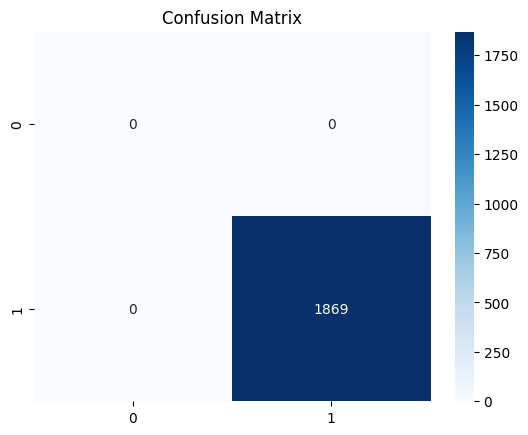

Accuracy Score: 1.0


In [18]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'X' and 'y' are your features and target variables
# Evaluate the model
y_pred = model.predict(X)

# Check unique values in actual data (y) and predicted data (y_pred)
print("Unique labels in actual data (y):", y.unique())
print("Unique labels in predicted data (y_pred):", np.unique(y_pred))

# Specify labels explicitly in confusion_matrix
labels = [0, 1]  # Replace with your actual labels, such as [0, 1] or ['No Churn', 'Churn']

# Classification Report
print("Classification Report:")
print(classification_report(y, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y, y_pred, labels=labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.show()

# Accuracy Score
print("Accuracy Score:", accuracy_score(y, y_pred))

# Step 10: Save and Export the Model

In [19]:
import joblib

# Step 11: Save the Model
model_path = r'C:\Users\Asus\Music\Customer Churn Prediction Using Python Project\customer_churn_model.pkl'
joblib.dump(model, model_path)
print(f"Model saved to {model_path}")

Model saved to C:\Users\Asus\Music\Customer Churn Prediction Using Python Project\customer_churn_model.pkl
